In [ ]:
# Install necessary libraries if not already installed
!pip install pandas openpyxl scikit-learn torch torchvision

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('my (2).xlsx')

# Print the first few rows to verify
print(df.head())


In [ ]:
# Print column names
print(df.columns)


In [ ]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Check the cleaned column names
print(df.columns)


In [ ]:
# Print column names to verify
print(df.columns)


Index(['Posture', 'Strain', 'Muscle Status'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('my (2).xlsx')

# Verify the first few rows and column names
print(df.head())
print(df.columns)

# Prepare features and target
X = df[['Posture', 'Strain']].values
y = df['Muscle Status'].values  # Use 'Muscle Status' as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Posture  Strain  Muscle Status
0       40      67              1
1       41      41              0
2       42      38              0
3       43      39              0
4       44      39              0
Index(['Posture', 'Strain', 'Muscle Status'], dtype='object')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, padding=2)  # Added padding
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, padding=2)  # Added padding
        self.lstm = nn.LSTM(32, 64, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(64 * 2, 128)  # Adjusted for bidirectional LSTM

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)  # Added pooling after second conv layer
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take the last output of LSTM
        x = self.fc1(x)
        return x

model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Example of


In [ ]:
def forward(self, x):
    print(f'Input shape: {x.shape}')
    x = self.conv1(x)
    print(f'After conv1: {x.shape}')
    x = self.pool(x)
    print(f'After pool1: {x.shape}')
    x = self.conv2(x)
    print(f'After conv2: {x.shape}')
    x = self.pool(x)
    print(f'After pool2: {x.shape}')
    x, _ = self.lstm(x)
    print(f'After LSTM: {x.shape}')
    x = x[:, -1, :]  # Take the last output of LSTM
    print(f'After selecting last LSTM output: {x.shape}')
    x = self.fc1(x)
    print(f'After fully connected layer: {x.shape}')
    return x


In [ ]:
# Assuming 'Muscle Status' has labels -1, 0, 1
df['Muscle Status'] = df['Muscle Status'].map({-1: 0, 0: 1, 1: 2})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Map labels from (-1, 0, 1) to (0, 1, 2)
train_labels_mapped = np.array([map_labels([label])[0].item() for label in train_labels])
test_labels_mapped = np.array([map_labels([label])[0].item() for label in test_labels])

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels_mapped)

# Predict on test data
test_predictions = rf_classifier.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels_mapped, test_predictions)
print(f'Random Forest Test Accuracy: {accuracy:.4f}')


Random Forest Test Accuracy: 0.9933


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

class CNNLSTMModel(nn.Module):
    def __init__(self):
        super(CNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(2)
        self.lstm = nn.LSTM(32, 64, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(64 * 2, 128)  # Output from LSTM

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        if x.size(2) < 2:
            x = nn.functional.pad(x, (0, 2 - x.size(2)))
        x = self.conv2(x)
        x = self.pool2(x)
        if x.size(2) < 2:
            x = nn.functional.pad(x, (0, 2 - x.size(2)))
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Last time step
        features = self.fc1(x)
        return features


In [ ]:
# Test accuracy
test_accuracy = accuracy_score(test_labels_mapped, test_predictions)
print(f'Hybrid Model Test Accuracy: {test_accuracy:.4f}')

# Additional metrics (Precision, Recall, F1-score)
test_report = classification_report(test_labels_mapped, test_predictions)
print("Test Set Classification Report:")
print(test_report)


Hybrid Model Test Accuracy: 0.9967
Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       207
           2       0.97      1.00      0.99        38

    accuracy                           1.00       300
   macro avg       0.99      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
from sklearn.metrics import accuracy_score

# Training accuracy
train_accuracy = accuracy_score(train_labels_mapped, train_predictions)
print(f'Hybrid Model Training Accuracy: {train_accuracy:.4f}')


Hybrid Model Training Accuracy: 0.9942


In [ ]:
# Test accuracy
test_accuracy = accuracy_score(test_labels_mapped, test_predictions)
print(f'Hybrid Model Test Accuracy: {test_accuracy:.4f}')


Hybrid Model Test Accuracy: 0.9967


In [ ]:
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for the test set
test_probabilities = rf_classifier.predict_proba(test_features)

# Binarize the output labels for ROC curve calculation
test_labels_bin = label_binarize(test_labels_mapped, classes=[0, 1, 2])


In [ ]:
from sklearn.metrics import roc_curve, auc

# Initialize lists to store ROC data
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(test_labels_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
# Get predicted probabilities for the test set
test_probabilities = rf_classifier.predict_proba(test_features)

# If you have multiple classes, you need to handle them separately. For binary classification, it's simpler.
# Binarize the output labels for ROC curve calculation
from sklearn.preprocessing import label_binarize

# Binarize the test labels
test_labels_bin = label_binarize(test_labels_mapped, classes=[0, 1, 2])




---



In [ ]:
# Modify the data preprocessing to add a single channel
features = np.expand_dims(features, axis=1)  # Add a single channel dimension


***Applying Hybird ANN-Randm Forest Modle.***




In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)  # Output layer for 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Prepare the dataset
df = pd.read_excel('my (2).xlsx')

# Preprocess the dataset
features = df[['Posture', 'Strain']].values
labels = df['Muscle Status'].values

# Convert labels from -1, 0, 1 to 0, 1, 2
def map_labels(labels):
    label_map = {-1: 0, 0: 1, 1: 2}
    return np.array([label_map[label] for label in labels])

features = features.astype(np.float32)
labels = map_labels(labels)

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate and train the ANN model
ann_model = ANNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    ann_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ann_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Extract features from the ANN model
ann_model.eval()
with torch.no_grad():
    train_features = []
    train_labels = []
    for inputs, labels in train_loader:
        features = ann_model(inputs).numpy()
        train_features.append(features)
        train_labels.append(labels.numpy())
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

    test_features = []
    test_labels = []
    for inputs, labels in test_loader:
        features = ann_model(inputs).numpy()
        test_features.append(features)
        test_labels.append(labels.numpy())
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

# Train Random Forest on ANN features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Predict
test_predictions = rf_classifier.predict(test_features)

# Compute accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(test_labels, test_predictions))

# Binarize the output labels
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])

# Get predicted probabilities
test_probabilities = rf_classifier.predict_proba(test_features)

# Compute ROC curve and AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(test_labels_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_labels_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

# Compute and plot the average ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)
for i in range(test_labels_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= test_labels_bin.shape[1]

plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', label='Mean ROC (area = {:.2f})'.format(auc(all_fpr, mean_tpr)))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute overall AUC
overall_auc = roc_auc_score(test_labels_bin, test_probabilities, multi_class='ovr')
print(f'Overall AUC: {overall_auc:.4f}')


Epoch 1/10, Loss: 0.5457
Epoch 2/10, Loss: 0.4699
Epoch 3/10, Loss: 0.4742
Epoch 4/10, Loss: 0.4832
Epoch 5/10, Loss: 0.4326
Epoch 6/10, Loss: 0.5942
Epoch 7/10, Loss: 0.5232
Epoch 8/10, Loss: 0.4136
Epoch 9/10, Loss: 0.7101
Epoch 10/10, Loss: 0.4021
Test Accuracy: 0.9844
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.99      0.99      0.99       317
           2       0.94      0.92      0.93        48

    accuracy                           0.98       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



Overall AUC: 0.9941


Epoch 1/10, Loss: 0.7887
Epoch 2/10, Loss: 0.5591
Epoch 3/10, Loss: 0.5122
Epoch 4/10, Loss: 0.5010
Epoch 5/10, Loss: 0.4919
Epoch 6/10, Loss: 0.4800
Epoch 7/10, Loss: 0.4727
Epoch 8/10, Loss: 0.4528
Epoch 9/10, Loss: 0.4448
Epoch 10/10, Loss: 0.4501
Test Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       0.99      0.99      0.99       317
           2       0.94      0.92      0.93        48

    accuracy                           0.98       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



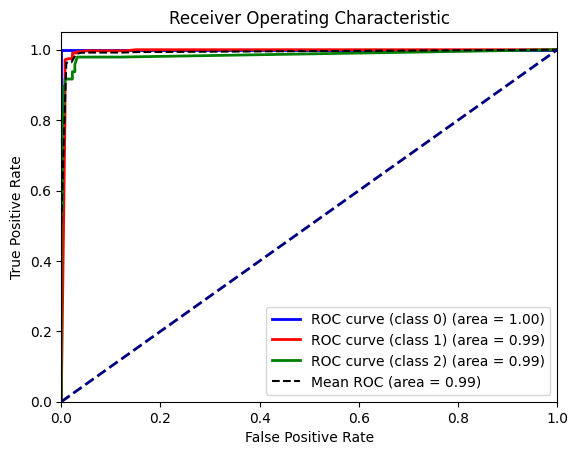

Overall AUC: 0.9934


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)  # Output layer for 3 classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Load and preprocess the dataset
df = pd.read_excel('my (2).xlsx')

features = df[['Posture', 'Strain']].values
labels = df['Muscle Status'].values

def map_labels(labels):
    label_map = {-1: 0, 0: 1, 1: 2}
    return np.array([label_map[label] for label in labels])

features = features.astype(np.float32)
labels = map_labels(labels)

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate and train the ANN model
ann_model = ANNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    ann_model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ann_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}')

# Extract features from the ANN model
ann_model.eval()
with torch.no_grad():
    train_features = []
    train_labels = []
    for inputs, labels in train_loader:
        features = ann_model(inputs).numpy()
        train_features.append(features)
        train_labels.append(labels.numpy())
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

    test_features = []
    test_labels = []
    for inputs, labels in test_loader:
        features = ann_model(inputs).numpy()
        test_features.append(features)
        test_labels.append(labels.numpy())
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

# Train Random Forest on ANN features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Predict
train_predictions = rf_classifier.predict(train_features)
test_predictions = rf_classifier.predict(test_features)

# Compute accuracy
print(f'Test Accuracy: {accuracy_score(test_labels, test_predictions):.4f}')

# Classification report
print(classification_report(test_labels, test_predictions))

# Binarize the output labels
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])

# Get predicted probabilities
test_probabilities = rf_classifier.predict_proba(test_features)

# Compute ROC curve and AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(test_labels_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_labels_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

# Compute and plot the average ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)
for i in range(test_labels_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= test_labels_bin.shape[1]

plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', label='Mean ROC (area = {:.2f})'.format(auc(all_fpr, mean_tpr)))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute overall AUC
overall_auc = roc_auc_score(test_labels_bin, test_probabilities, multi_class='ovr')
print(f'Overall AUC: {overall_auc:.4f}')


Epoch 1/10, Loss: 0.7936
Epoch 2/10, Loss: 0.5813
Epoch 3/10, Loss: 0.5394
Epoch 4/10, Loss: 0.4962
Epoch 5/10, Loss: 0.4853
Epoch 6/10, Loss: 0.4742
Epoch 7/10, Loss: 0.4693
Epoch 8/10, Loss: 0.4548
Epoch 9/10, Loss: 0.4484
Epoch 10/10, Loss: 0.4418


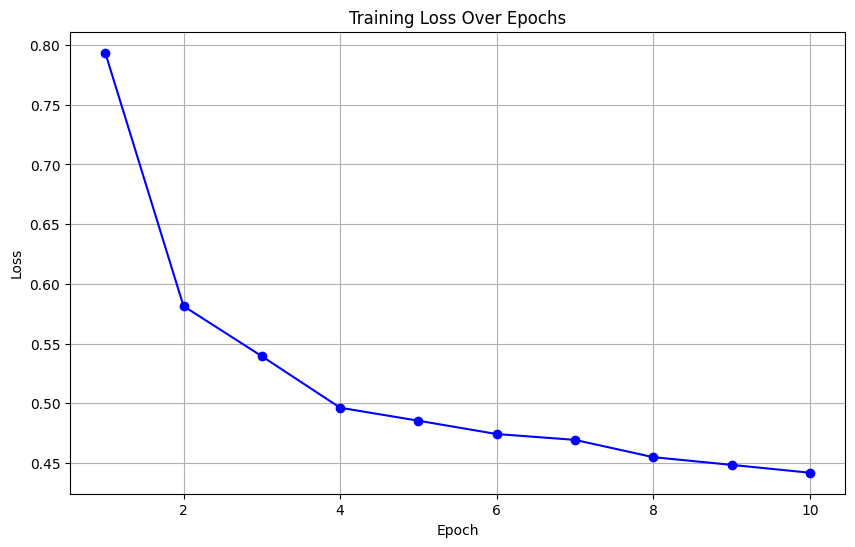

Test Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       0.99      0.99      0.99       317
           2       0.94      0.92      0.93        48

    accuracy                           0.98       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



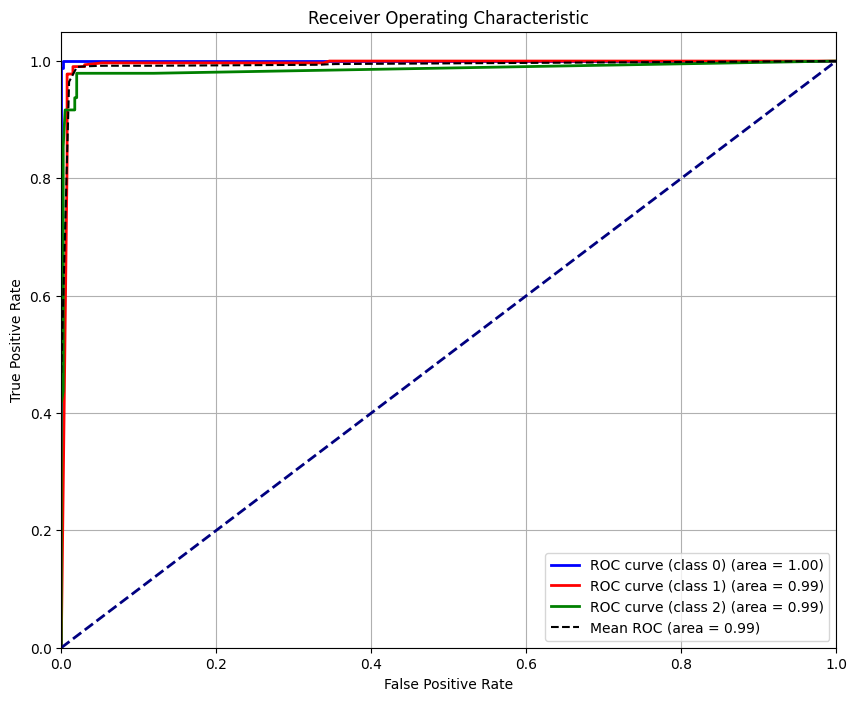

Overall AUC: 0.9934


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)  # Output layer for 3 classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Load and preprocess the dataset
df = pd.read_excel('my (2).xlsx')

features = df[['Posture', 'Strain']].values
labels = df['Muscle Status'].values

def map_labels(labels):
    label_map = {-1: 0, 0: 1, 1: 2}
    return np.array([label_map[label] for label in labels])

features = features.astype(np.float32)
labels = map_labels(labels)

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate and train the ANN model
ann_model = ANNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []  # To store the loss for each epoch

for epoch in range(num_epochs):
    ann_model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ann_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}')

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

# Extract features from the ANN model
ann_model.eval()
with torch.no_grad():
    train_features = []
    train_labels = []
    for inputs, labels in train_loader:
        features = ann_model(inputs).numpy()
        train_features.append(features)
        train_labels.append(labels.numpy())
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

    test_features = []
    test_labels = []
    for inputs, labels in test_loader:
        features = ann_model(inputs).numpy()
        test_features.append(features)
        test_labels.append(labels.numpy())
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

# Train Random Forest on ANN features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Predict
train_predictions = rf_classifier.predict(train_features)
test_predictions = rf_classifier.predict(test_features)

# Compute accuracy
print(f'Test Accuracy: {accuracy_score(test_labels, test_predictions):.4f}')

# Classification report
print(classification_report(test_labels, test_predictions))

# Binarize the output labels
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])

# Get predicted probabilities
test_probabilities = rf_classifier.predict_proba(test_features)

# Compute ROC curve and AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(test_labels_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_labels_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

# Compute and plot the average ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)
for i in range(test_labels_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= test_labels_bin.shape[1]

plt.plot(all_fpr, mean_tpr, color='black', linestyle='--', label='Mean ROC (area = {:.2f})'.format(auc(all_fpr, mean_tpr)))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute overall AUC
overall_auc = roc_auc_score(test_labels_bin, test_probabilities, multi_class='ovr')
print(f'Overall AUC: {overall_auc:.4f}')
